In [1]:
import torch
img_t = torch.randn(3, 5, 5)    #<-- creates a tensor of the given size with values from a noramlly distributed random variable 
weights = torch.tensor([0.2126, 0.7152, 0.0722])    #<-- weights to transform colors into grayscale

This code imports the PyTorch library and creates a 3-dimensional tensor `img_t` of size `(3, 5, 5)` with values drawn from a normal distribution using `torch.randn()`. 

The second line creates a tensor `weights` of size `(3,)` with the values `[0.2126, 0.7152, 0.0722]`. These values are the weights used to transform a color image into grayscale using a weighted sum of the color channels.

In [3]:
batch_t = torch.randn(2, 3, 5, 5)   #<-- creates a tensor of the given size filled with RandN values
                                    # shape [batch, channels, rows, columns]
                                    # meaning we here have fabricated to "images" in the same batch

This code creates a 4-dimensional tensor `batch_t` of size `(2, 3, 5, 5)` with values drawn from a normal distribution using `torch.randn()`. 

The first dimension of size `2` represents the batch size, meaning that `batch_t` contains two images in the same batch. The second dimension of size `3` represents the number of color channels in each image, which is usually 3 for RGB images. The last two dimensions of size `5` represent the height and width of each image.

In [4]:
img_gray_naive = img_t.mean(-3)     #<-- averages the values in the 3rd dimention from the end, aka. the colors dimension
batch_grey_naive = batch_t.mean(-3) #<-- averages the values of the colors dimension, that's why we've chosen the 3rd from the end, it's because
                                    #    we may have a batch dimension, meaning the colors' order may be the 0th or the 1st, but it will be
                                    #    surely the 3rd from the end
            
img_gray_naive.shape, batch_grey_naive.shape

(torch.Size([5, 5]), torch.Size([2, 5, 5]))

This code computes the grayscale version of an image tensor `img_t` and a batch of image tensors `batch_t` using a naive method of averaging the color channels. 

The first line computes the grayscale version of `img_t` by taking the mean of the values in the third dimension from the end, which corresponds to the color channels. This results in a tensor of shape `(5, 5)`.

The second line computes the grayscale version of `batch_t` by taking the mean of the values in the third dimension from the end, which corresponds to the color channels. Since `batch_t` has a batch dimension as the first dimension, the `mean` operation is applied to each image in the batch separately. This results in a tensor of shape `(2, 5, 5)`. 

The output of this code is a tuple containing the shapes of the grayscale image tensor and the grayscale batch tensor, which are `(5, 5)` and `(2, 5, 5)` respectively.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


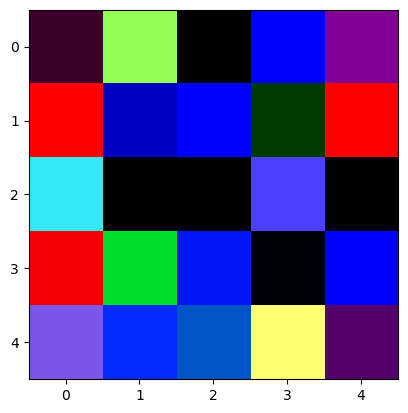

In [10]:
#imshow img_t in rgb
import matplotlib.pyplot as plt
plt.imshow(img_t.permute(1, 2, 0))  #<-- permute the dimensions of the tensor, so that the colors dimension is the last one
                                    #    so that imshow can plot it


In PyTorch, images are typically formatted as tensors with shape `(batch_size, channels, height, width)`, or `BCHW` for short. The `channels` dimension refers to the number of color channels in the image, which is usually 3 for RGB images (red, green, blue). 

However, when displaying an image using `matplotlib`, the color channels are expected to be the last dimension, so the tensor needs to be permuted to have shape `(height, width, channels)` or `HWC`.